In [1]:
import os
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler 


from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


from collections import Counter
from sklearn.datasets import make_classification


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support, roc_auc_score



In [2]:
df_1 = pd.read_csv('lendingclub_model.csv', sep = ',')
df_1

,loan_amnt,term,int_rate,annual_inc,delinq_2yrs,open_acc,revol_bal,total_acc,out_prncp,total_rec_prncp,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,hardship_flag_N,hardship_flag_Y,loan_status
0,11575.0,36,0.0735,153000.0,0.0,20.0,8550.0,46.0,0.0,11575.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
1,7200.0,36,0.2485,50000.0,0.0,4.0,3560.0,5.0,0.0,7200.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
2,7500.0,36,0.0735,110000.0,0.0,19.0,23348.0,27.0,0.0,7500.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
3,10000.0,60,0.1602,51979.0,0.0,15.0,5733.0,21.0,0.0,10000.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
4,14000.0,36,0.1602,75000.0,1.0,4.0,2700.0,10.0,0.0,14000.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462186,11575.0,36,0.1559,25400.0,0.0,9.0,18266.0,18.0,0.0,11575.00,...,0,0,0,0,0,0,0,1,0,Fully Paid
462187,12000.0,36,0.1199,63000.0,1.0,13.0,21110.0,61.0,0.0,3847.36,...,0,0,0,0,0,0,0,1,0,Charged Off
462188,13000.0,60,0.1599,35000.0,0.0,9.0,11031.0,22.0,0.0,2527.70,...,0,0,0,0,0,0,0,1,0,Charged Off
462189,12000.0,60,0.1999,64400.0,1.0,17.0,8254.0,20.0,0.0,1552.69,...,0,0,0,0,0,0,0,1,0,Charged Off


In [3]:
df_1['loan_status'].mask(df_1['loan_status'] == 'Fully Paid', 1, inplace=True)
df_1['loan_status'].mask(df_1['loan_status'] != 1, 0, inplace=True)

In [4]:
l = df_1["loan_status"]
np.unique(l)

array([0, 1], dtype=object)

# PREPROCESSING

In [5]:
df=df_1.sample(n=12000, random_state=1234)
scaler = StandardScaler()

X = df.drop(['loan_status'], axis=1)
y = df['loan_status']


y=y.astype('int')
X=X.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# UNDERSAMPLING

In [6]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 8973, 0: 3027})


In [7]:
ros = RandomUnderSampler(random_state=42,sampling_strategy=0.4)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 7567, 0: 3027})


In [8]:
y = y_res.astype('int')
X = X_res.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Logistic Regression

La regresión logística es un algoritmo de clasificación de aprendizaje automático que se utiliza para predecir la probabilidad de una variable dependiente categórica. En la regresión logística, la variable dependiente es una variable binaria que contiene datos codificados como 1 (sí, éxito, etc.) o 0 (no, fracaso, etc.). En otras palabras, el modelo de regresión logística predice P (Y = 1) en función de X.


#### Supuestos de regresión logística

* La regresión logística binaria requiere que la variable dependiente sea binaria.
* Para una regresión binaria, el nivel de factor 1 de la variable dependiente debe representar el resultado deseado.
* Solo deben incluirse las variables significativas.
* Las variables independientes deben ser independientes entre sí. Es decir, el modelo debe tener poca o ninguna multicolinealidad.
* Las variables independientes están relacionadas linealmente con las probabilidades logarítmicas.
* La regresión logística requiere tamaños de muestra bastante grandes.
* Teniendo en cuenta las suposiciones anteriores, veamos nuestro conjunto de datos.

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\Apuntes\anaconda\envs\lendingclub\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SCORING

Confusion matrix, without normalization
[[ 983   37]
 [   3 2474]]
Normalized confusion matrix
[[0.96372549 0.03627451]
 [0.00121114 0.99878886]]


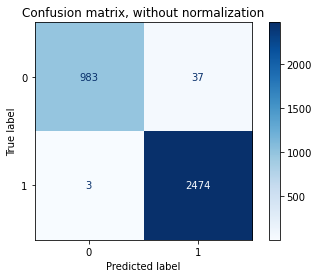

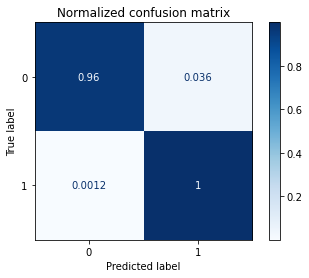

In [11]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [12]:
print('Accuracy: %.4f'%accuracy_score(y_test, y_pred))
print('AUC: %.4f'%roc_auc_score(y_test, y_pred))
print('F1-Score: %.4f'%f1_score(y_test, y_pred))

print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))

Accuracy: 0.9886
AUC: 0.9813
F1-Score: 0.9920

Classification Report                       : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1020
           1       0.99      1.00      0.99      2477

    accuracy                           0.99      3497
   macro avg       0.99      0.98      0.99      3497
weighted avg       0.99      0.99      0.99      3497



# Pickle

In [ ]:
# Save to file in the current working directory
logreg_pkl = "regresion_logistica.pkl"
with open(logreg_pkl, 'wb') as file:
    pickle.dump(logreg, file)